In [ ]:
data=open('ridgetrain.txt',"r")
d=data.read().split()
data1=[]
for i in range(0,len(d),2):
  data1.append([float(d[i]),float(d[i+1])])

In [ ]:
import numpy as np
import math
def rbf(x,y):
  return math.exp(-0.1*(np.linalg.norm(x-y)**2))

RMSE VALUE FOR LAMBDA = 2  is :  0.9794147330724643


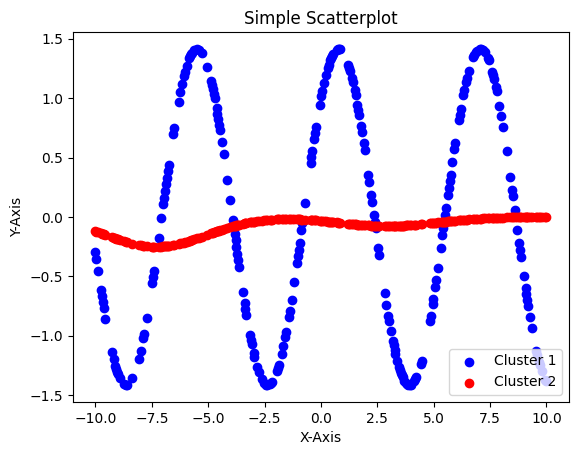

RMSE VALUE FOR LAMBDA = 5  is :  0.9050056134358028


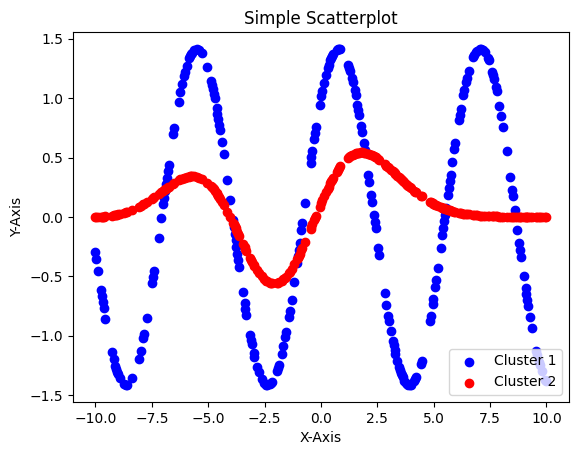

RMSE VALUE FOR LAMBDA = 20  is :  0.19378149954957183


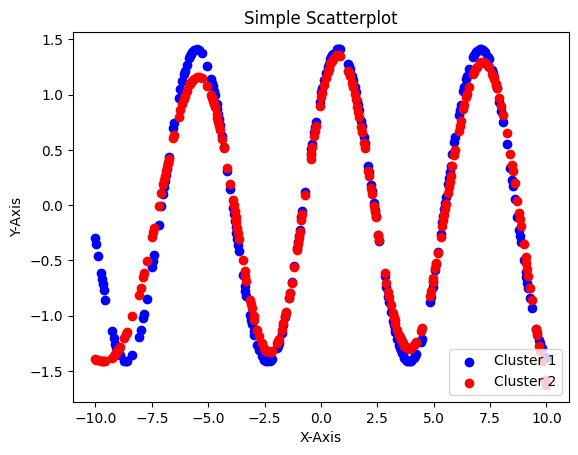

RMSE VALUE FOR LAMBDA = 50  is :  0.06675693784283664


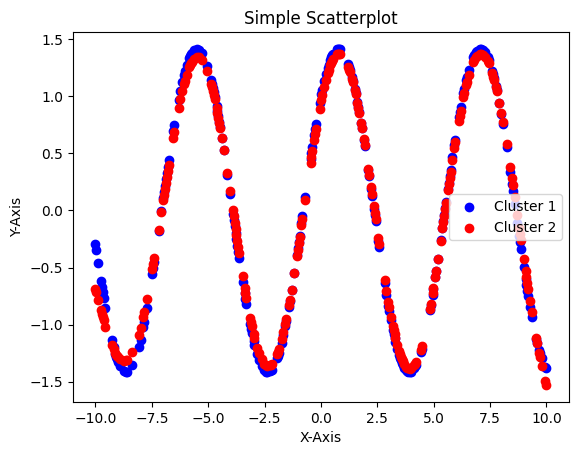

RMSE VALUE FOR LAMBDA = 100  is :  0.06527524720178093


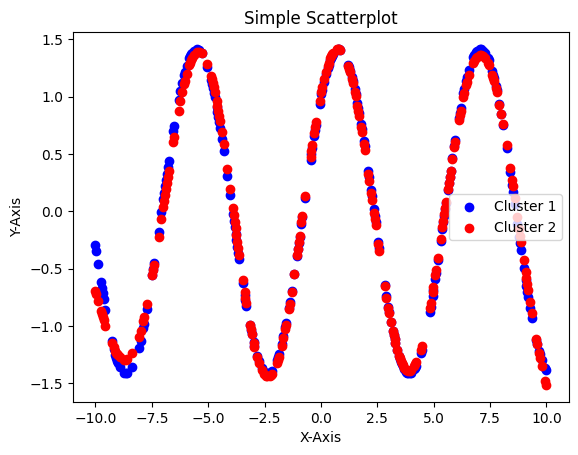

In [ ]:
import matplotlib.pyplot as plt
import random
# L=20
lams = [2, 5, 20, 50, 100]
for L in lams:
  landmark = []
  y = []
  for i in range(0,len(data1)):
    y.append(data1[i][1])
  for i in range(L):
    idx = random.randint(0, len(data1)-1)
    landmark.append(data1[idx])
  new_data = []
  for i in range(len(data1)):
    temp = []
    for j in range(L):
      temp.append(rbf(data1[i][0],landmark[j][0]))
    new_data.append(temp)
  temp1  = np.dot(np.transpose(new_data),new_data)
  identity_mat = np.identity(L)
  w = np.linalg.inv(temp1 + identity_mat*0.1)
  temp2 = np.dot(np.transpose(new_data),y)
  w = np.dot(w,temp2)
  data=open('ridgetest.txt',"r")
  d = data.read().split()
  # print(len(d))
  data2=[]
  for i in range(0,len(d),2):
    data2.append([float(d[i]),float(d[i+1])])
  new_test = []
  # print(len(data2))
  for i in range(len(data2)):
    temp = []
    for j in range(L):
      temp.append(rbf(data2[i][0],landmark[j][0]))
      # print("$")
    new_test.append(temp)
  # print(len(new_test),len(data2))
  pred = []
  for i in range(0,len(new_test)):
    pred.append(np.dot(w,np.transpose(new_test[i])))
  # print(pred)

  x=[]
  y=[]
  for i in range(len(data2)):
      x.append(data2[i][0])
      y.append(data2[i][1])
  RMSE=0
  for i in range(len(pred)):
    RMSE+=(pred[i]-data2[i][1])**2
  RMSE=RMSE/len(pred)
  RMSE=math.sqrt(RMSE)
  print("RMSE VALUE FOR LAMBDA =",L," is : ",RMSE)
  plt.scatter(x, y, marker='o', color='b', label='True Label')
  plt.scatter(x, pred, marker='o', color='r', label='Predicted Label')

  # Add labels and a title
  plt.xlabel('X-Axis')
  plt.ylabel('Y-Axis')
  plt.title('Simple Scatterplot')

  # Add a legend (if needed)
  plt.legend()

  # Show the plot
  plt.show()